<a href="https://colab.research.google.com/github/longbui23/Amazon-Sentiment-Analysis/blob/main/MultivariateRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MULTIVARIATE REGRESSION

In [3]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/ECON314: Amazon-Sentiment-Analysis

Mounted at /content/drive
/content/drive/My Drive/ECON314: Amazon-Sentiment-Analysis


## 1) Import packages and data

In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Data/clean_data.csv')
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Length
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,374.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,214.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,12.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,76.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,223.0


In [5]:
sentiment_df = pd.read_csv('Data/sentiment.csv')
sentiment_df.head()

,reviewID,Product Name,Brand Name,Price,Rating,Review,Review Votes,Review Length,sentimentScore,sentiment
0,0,Acer Liquid M220 Windows 8.1 Smartphone - Black,ACER,34.95,3,"this phone was a replacement for my niece, her...",4.0,642,0.003940,Neutral with Negative Feedback
1,1,Acer Liquid M220 Windows 8.1 Smartphone - Black,ACER,34.95,5,Dual Sims are better than one sim has blurred ...,2.0,51,0.625000,positive
2,2,Acer Liquid M220 Windows 8.1 Smartphone - Black,ACER,34.95,5,Nice phone. I am waiting to be upgraded to Win...,2.0,53,0.600000,positive
3,3,Acer Liquid M220 Windows 8.1 Smartphone - Black,ACER,34.95,1,I did not receive my order items.,0.0,33,0.000000,Neutral with Negative Feedback
4,4,Acer Liquid M220 Windows 8.1 Smartphone - Black,ACER,34.95,1,"First off, great service as usual. I wanted a ...",5.0,1164,0.077216,Neutral with Negative Feedback


# 2. Univariate Regression Analysis (Correlational Analysis)

Since the data points is not normally distributed we will try to find different methods such as normalizing data, removing outliers, or bucketing to find the best correlations between different attributes with sentiment score.

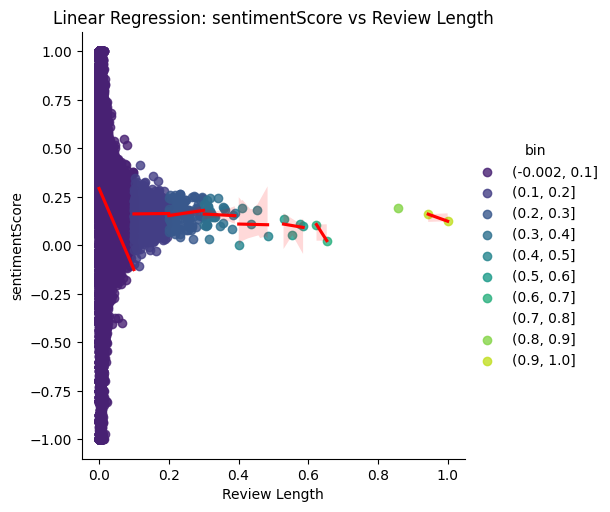

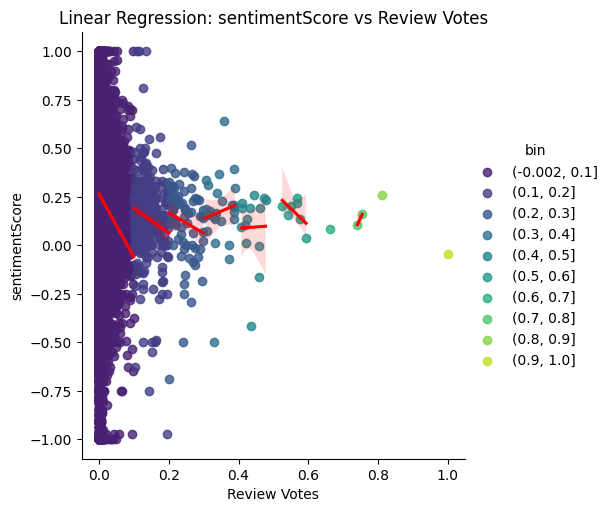

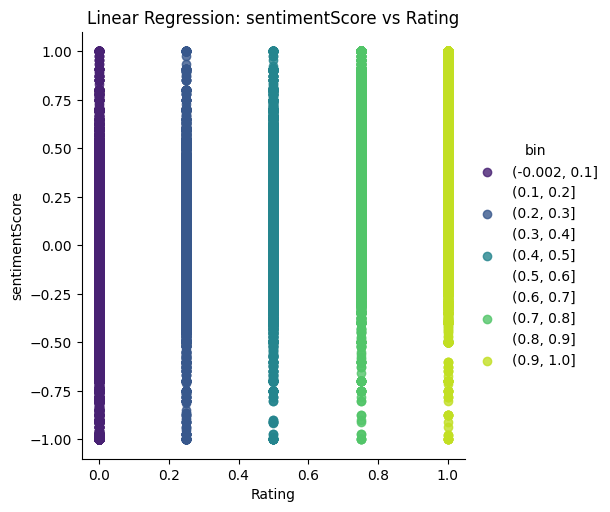

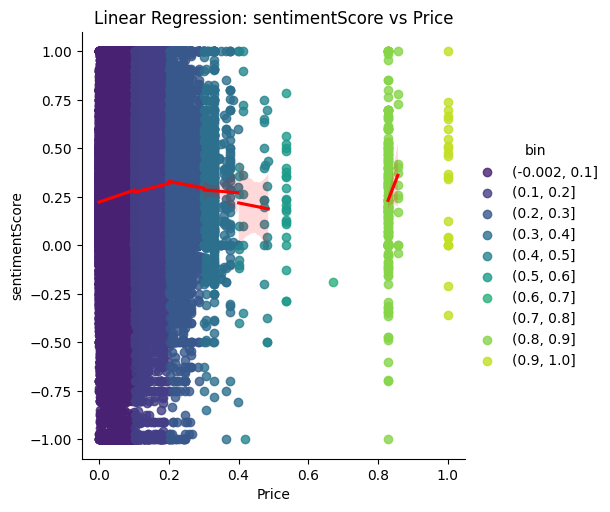

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# col to plot
columns = ['Review Length', 'Review Votes', 'Rating', 'Price']

# bins for bucketing --> evenly distributed data points (diving each fiture into fixed number of bins)
num_bins = 10

# Normalize the data
scaler = MinMaxScaler()
sentiment_df_normalized = sentiment_df.copy()
sentiment_df_normalized[columns] = scaler.fit_transform(sentiment_df[columns])

# Create subplots
for column in columns:
    # Binning the data
    bins = pd.cut(sentiment_df_normalized[column], bins=num_bins, include_lowest=True)
    sentiment_df_normalized['bin'] = bins

    sns.lmplot(x=column, y='sentimentScore', data=sentiment_df_normalized, hue='bin', palette='viridis', line_kws={'color': 'red'})
    plt.title(f'Linear Regression: sentimentScore vs {column}')
    plt.xlabel(column)
    plt.ylabel('sentimentScore')

plt.show()


# 3. Multivariate Regession (Models Building)

In [19]:
sentiment_df['Review Votes'].fillna(np.mean(sentiment_df['Review Votes']), inplace=True)

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)

# Train the model with best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Best parameters: {'alpha': 100}
Mean Squared Error: 23319.06520728265


In [21]:
best_model.score(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


-39.6172780319647